# Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import kagglehub
import shutil

## Load Dataset

In [10]:
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

data = './../data/brain-tumor-mri-dataset'
shutil.copytree(path, data)

Path to dataset files: /Users/jasonevan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


'./../data/brain-tumor-mri-dataset'

In [11]:
PATH = f'./../data/brain-tumor-mri-dataset/Training'
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=PATH,
    batch_size=64,
    image_size=(256, 256),
    seed=42,
)

Found 5712 files belonging to 4 classes.


## Count data on every class



Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']


2025-12-06 21:09:16.137097: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


glioma: 1321
meningioma: 1339
notumor: 1595
pituitary: 1457


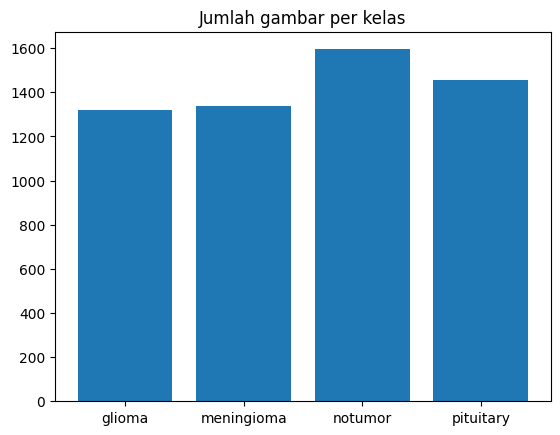

In [12]:
class_names = train_ds.class_names
print(f'Class names: {class_names}')

all_labels = []
for _, label in train_ds.unbatch():
  all_labels.append(label.numpy())

all_labels = np.array(all_labels)

counts = np.bincount(all_labels, minlength=len(class_names))
for i, count in enumerate(counts):
  print(f'{class_names[i]}: {count}')

plt.bar(class_names, counts)
plt.title("Jumlah gambar per kelas")
plt.show()

## Visualization Some Image

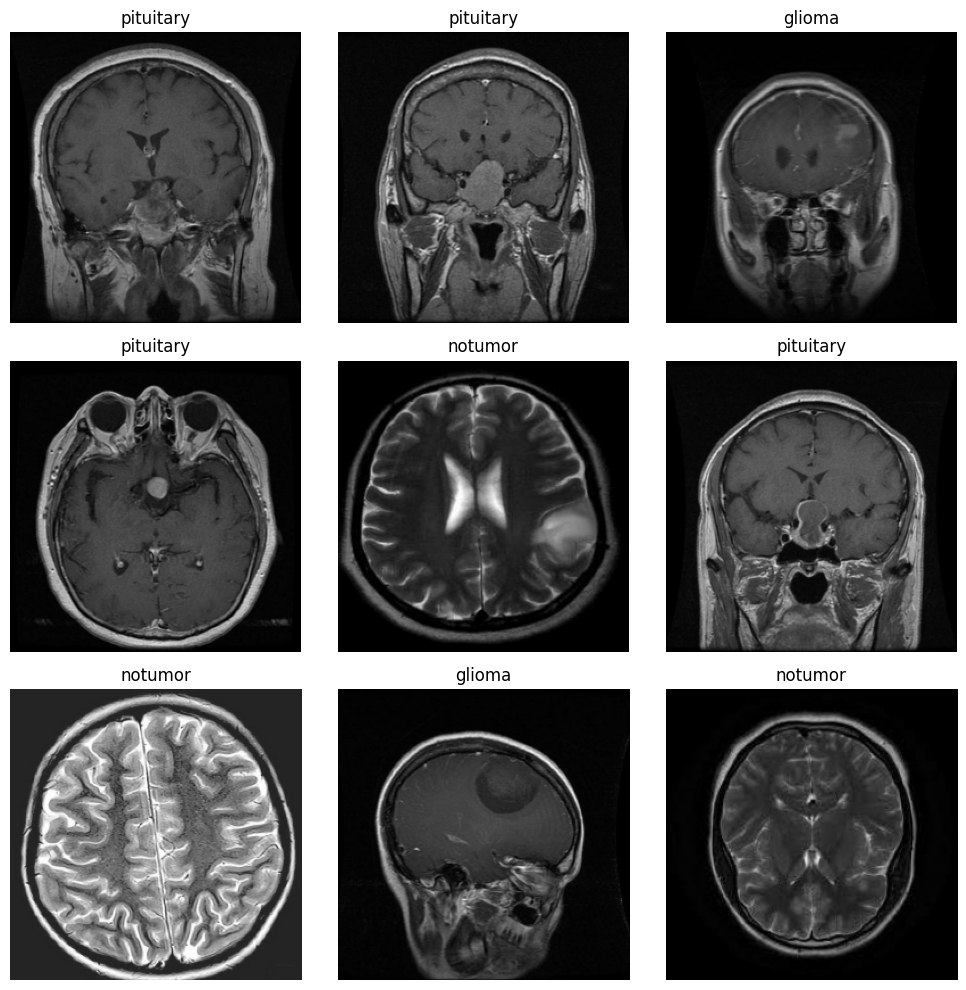

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

images, labels = next(iter(train_ds))

for i in range(9):
  axes[i].imshow(images[i].numpy().astype("uint8"))
  axes[i].set_title(class_names[labels[i].numpy()])
  axes[i].axis("off")

plt.tight_layout()
plt.show()

## Check Size of Image

In [14]:
for images, labels in train_ds.take(1):
  print(f'Image shape: {images.shape[1:]}')
  break

Image shape: (256, 256, 3)
